In [1]:
import sys
import cv2
import numpy as np
import habitat
from environment import environments
from habitat.sims.habitat_simulator.actions import HabitatSimActions
from habitat.utils.visualizations import maps
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
!ln -s /data/ ./data

In [3]:
config=habitat.get_config("./configs/pointnav_kozub.yaml")
config['DATASET']['DATA_PATH'] = '/data/v1/{split}/{split}.json.gz'
config['DATASET']['SCENES_DIR'] = '/data'
config['DATASET']['SPLIT'] = 'train'
env = environments.NavRLEnv\
        (
    config=config
    )
print("Environment creation successful")

2020-04-11 20:27:42,572 Initializing dataset PointNav-v1
2020-04-11 20:29:26,722 initializing sim Sim-v0
2020-04-11 20:29:31,064 Initializing task Nav-v0


Environment creation successful


In [4]:
top_down_map = maps.get_topdown_map(env.sim(), map_resolution=(250, 250))

In [5]:
env.sim().get_agent_state()

AgentState(position=array([0.945982  , 0.15964921, 3.759702  ], dtype=float32), rotation=quaternion(0.578173756599426, 0, 0.815913677215576, 0), velocity=array([0., 0., 0.]), angular_velocity=array([0., 0., 0.]), force=array([0., 0., 0.]), torque=array([0., 0., 0.]), sensor_states={'rgb': SixDOFPose(position=array([0.945982 , 1.4096493, 3.759702 ], dtype=float32), rotation=quaternion(0.578173756599426, 0, 0.815913677215576, 0)), 'depth': SixDOFPose(position=array([0.945982 , 1.4096493, 3.759702 ], dtype=float32), rotation=quaternion(0.578173756599426, 0, 0.815913677215576, 0))})

In [6]:
def get_informative_part(_map):
    top, down, left, right = -1, -1, -1, -1
    i, j = 0, 0
    while (_map[i,:] == 0).all():
        i += 1
    top = i
    while (_map[i,:] != 0).any():
        i += 1
    down = i
    while (_map[:,j] == 0).all():
        j += 1
    left = j
    while (_map[:,j] != 0).any():
        j += 1
    right = j
    return top, down, left, right

In [7]:
def show_obs(env):
    res = env.sim().get_observations_at()
    
    fig, ax = plt.subplots(1, 2, figsize=(20, 10))
    
    plt.subplot(1, 2, 1)
    plt.imshow(res['rgb'])
    plt.title('rgb')
    
    plt.subplot(1, 2, 2)
    plt.imshow(res['depth'][:,:,0], cmap='gray')
    plt.title('depth')
    
    plt.show()

In [8]:
def show_agent_info(env, map_size=250):
    print(env.sim().get_agent_state())
    top_down_map = maps.get_topdown_map(env.sim(), map_resolution=(map_size, map_size))

    fig, ax = plt.subplots(2, 2, figsize=(20, 20))

    plt.subplot(2, 2, 3)
    plt.imshow(top_down_map)
    plt.title('top_down_view full')

    plt.subplot(2, 2, 4)
    pos = get_informative_part(top_down_map)
    plt.imshow(top_down_map[pos[0]:pos[1], pos[2]:pos[3]])
    plt.title('top_down_view informative')

    plt.subplot(2, 2, 1)
    plt.imshow(env.sim().get_observations_at()['rgb'])
    plt.title('rgb observation')

    plt.subplot(2, 2, 2)
    plt.imshow(env.sim().get_observations_at()['depth'][:,:,0], cmap='gray')
    plt.title('depth observation')

    plt.show()

AgentState(position=array([0.945982  , 0.15964921, 3.759702  ], dtype=float32), rotation=quaternion(0.578173756599426, 0, 0.815913677215576, 0), velocity=array([0., 0., 0.]), angular_velocity=array([0., 0., 0.]), force=array([0., 0., 0.]), torque=array([0., 0., 0.]), sensor_states={'rgb': SixDOFPose(position=array([0.945982 , 1.4096493, 3.759702 ], dtype=float32), rotation=quaternion(0.578173756599426, 0, 0.815913677215576, 0)), 'depth': SixDOFPose(position=array([0.945982 , 1.4096493, 3.759702 ], dtype=float32), rotation=quaternion(0.578173756599426, 0, 0.815913677215576, 0))})


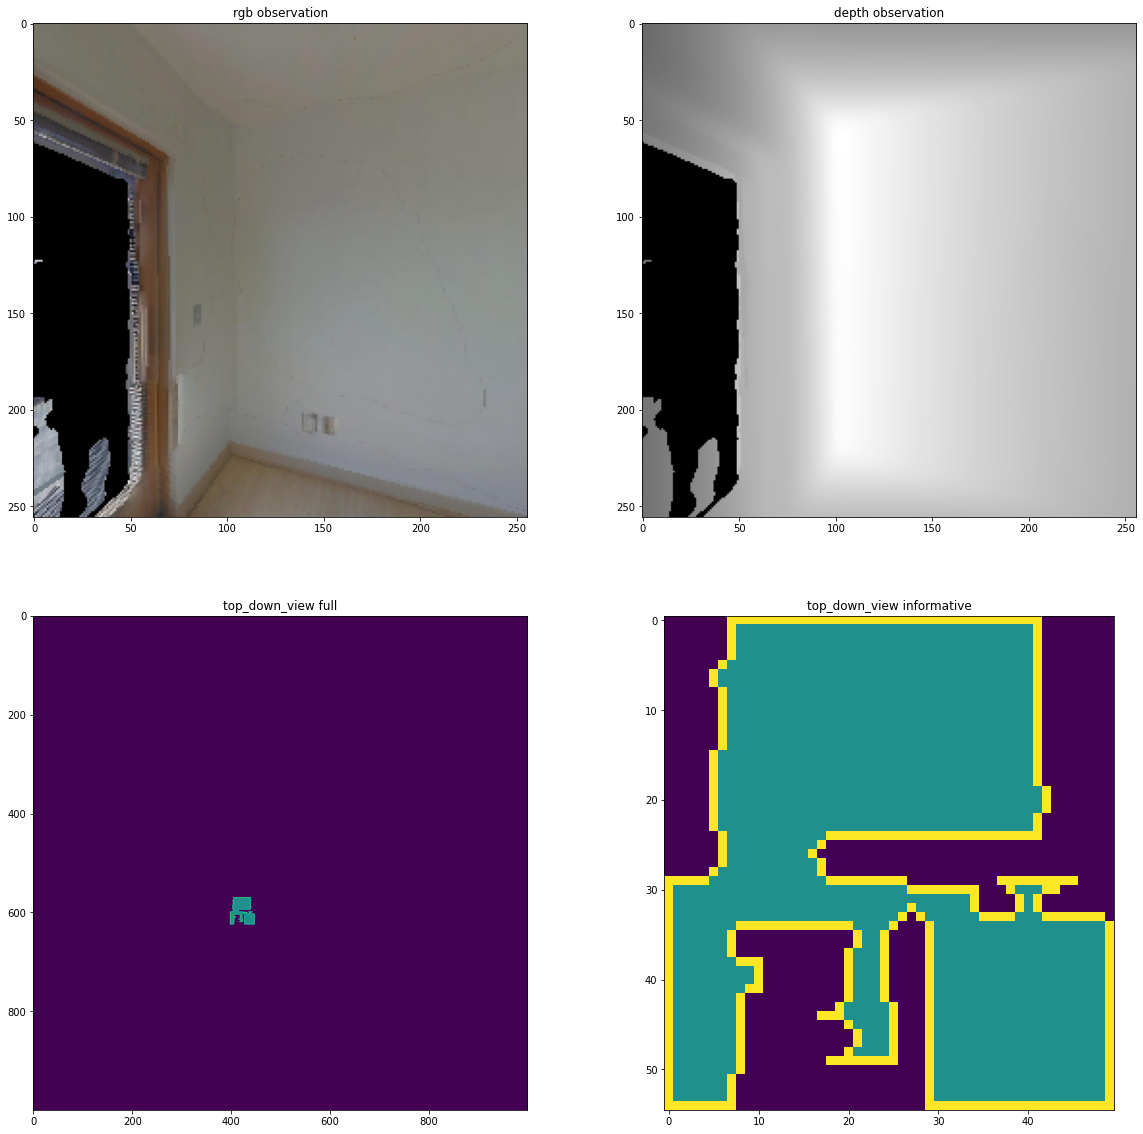

In [9]:
show_agent_info(env, 1000)

In [10]:
env.sim().action_space

Discrete(4)

Actions:

0 - stop (no move for this action)

1 - forward

2 - turn left

3 - turn right

In [11]:
from IPython.display import clear_output
c = ''
actions = {'w':1, 'a':2, 'd':3}
while(True):
    c = input()
    if (c not in actions):
        break
    res = env.sim().step(action=actions[c])
    
    clear_output(True)
    print(env.sim().get_agent_state())
    
    fig, ax = plt.subplots(1, 2, figsize=(20, 10))
    
    plt.subplot(1, 2, 1)
    plt.imshow(res['rgb'])
    plt.title('rgb')
    
    plt.subplot(1, 2, 2)
    plt.imshow(res['depth'][:,:,0], cmap='gray')
    plt.title('depth')
    
    plt.show()

 f


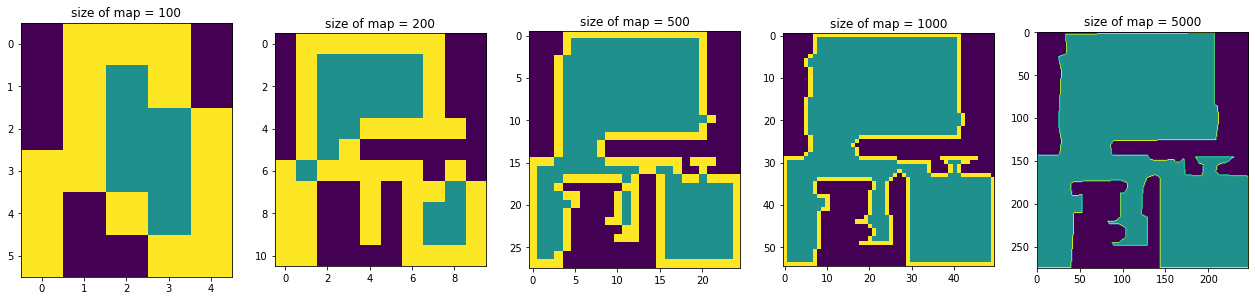

In [12]:
sizes = [100, 200, 500, 1000, 5000]
fig, ax = plt.subplots(1, len(sizes), figsize=(22, 10))
for i, size_of_map in enumerate(sizes):
    plt.subplot(1, len(sizes), i+1)
    top_down_map = maps.get_topdown_map(env.sim(), map_resolution=(size_of_map, size_of_map), draw_border=True)
    pos = get_informative_part(top_down_map)
    plt.imshow(top_down_map[pos[0]:pos[1], pos[2]:pos[3]])
    plt.title('size of map = {}'.format(size_of_map))
plt.show()

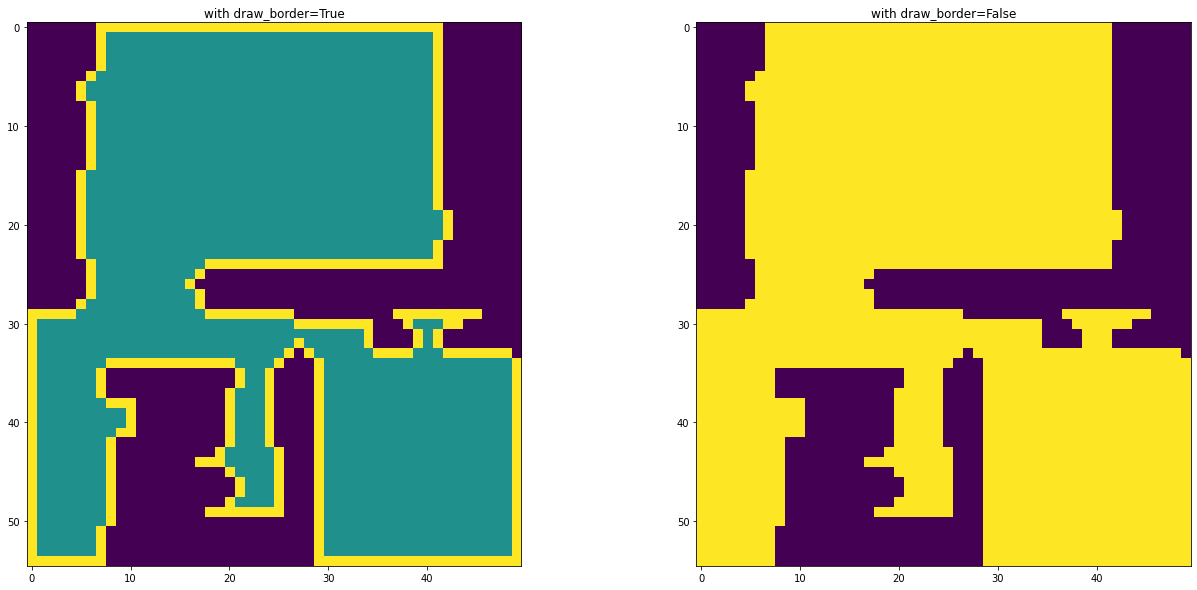

In [13]:
size_of_map = 1000
fig, ax = plt.subplots(1, 2, figsize=(22, 10))
plt.subplot(1, 2, 1)
top_down_map = maps.get_topdown_map(env.sim(), map_resolution=(size_of_map, size_of_map), draw_border=True)
pos = get_informative_part(top_down_map)
plt.imshow(top_down_map[pos[0]:pos[1], pos[2]:pos[3]])
plt.title('with draw_border=True')

plt.subplot(1, 2, 2)
top_down_map = maps.get_topdown_map(env.sim(), map_resolution=(size_of_map, size_of_map), draw_border=False)
pos = get_informative_part(top_down_map)
plt.imshow(top_down_map[pos[0]:pos[1], pos[2]:pos[3]])
plt.title('with draw_border=False')

plt.show()

In [14]:
# def depth2ptsCloud(depth):
def depth2ptsCloud(depth, cx, cy, fx, fy):
    h, w = depth.shape
    x = np.linspace(0, w - 1, w)
    y = np.linspace(0, h - 1, h)
    xv, yv = np.meshgrid(x[::-1], y)
    xv = xv.reshape((-1))
    yv = yv.reshape((-1))
    dfl = depth.T.reshape((-1))
    # cx, cy = h/2, w/2
    return np.concatenate(((dfl*(xv - cx)/fx)[:,None], (dfl*(yv-cy)/fy)[:,None], dfl[:,None]), 1)  
    # --> slambased mapper, убирают искажения через фокус камеры, не до конца понимаю
    # return np.concatenate((xv[:,None], yv[:,None], dfl[:,None]), 1)

In [15]:
res = env.sim().reset()

In [16]:
depth = env.sim().get_observations_at()['depth'][:,:,0]

In [17]:
from mpl_toolkits.mplot3d import Axes3D

def plt_ptsCloud(pts):
    fig = plt.figure()
    ax = Axes3D(fig)

    # y, z, x because of 3d matplotlib axes _x /y |z
    ax.scatter(pts[:,1], pts[:,2], pts[:,0], s=0.01)
    plt.show()

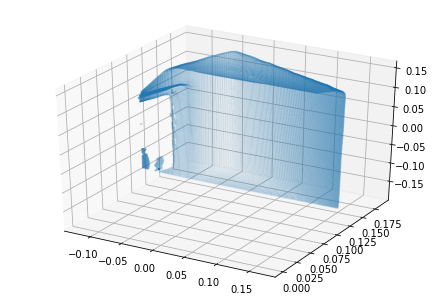

In [18]:
cx, cy = 127.5, 127.5
fx, fy = 100, 100
points = depth2ptsCloud(depth, cx, cy, fx, fy)

plt_ptsCloud(points)

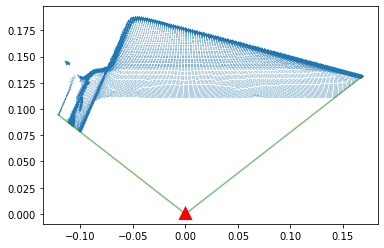

In [19]:
plt.scatter(points[:,1], points[:,2],s=0.01)

s_ = 1000
x_ = np.linspace(np.min(points[:,1]), np.max(points[:,1]), s_)
plt.plot(x_[x_<0], -0.78*x_[x_<0], 'g', alpha=0.5)
plt.plot(x_[x_>0], 0.78*x_[x_>0], 'g', alpha=0.5)
plt.plot(0, 0, 'r^', mew=5)

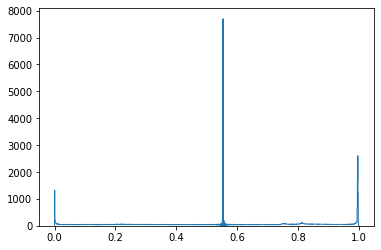

In [20]:
pts = points[:,0] - np.min(points[:,0])
pts = pts / np.max(pts)
plt.hist(pts, 1000, histtype='step')
plt.show()

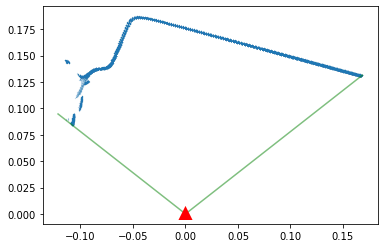

In [21]:
len_z = max(points[:,0]) - min(points[:,0])
# pts_x = sorted(points[:,0])
floor_lvl = min(points[:,0]) + 0.1*len_z
head_lvl = max(points[:,0]) - 0.3*len_z
points_tdv = points[(points[:,0] > floor_lvl) * (points[:,0] < head_lvl)][:,1:]
# points_tdv = points[points[:,0]>pts_x[round(0.1*len(pts_x))]]
# points_tdv = points_tdv[points_tdv[:,0]<pts_x[round(0.9*len(pts_x))]]
plt.scatter(points_tdv[:,0], points_tdv[:,1], s=0.01)

plt.plot(x_[x_<0], -0.78*x_[x_<0], 'g', alpha=0.5)
plt.plot(x_[x_>0], 0.78*x_[x_>0], 'g', alpha=0.5)
plt.plot(0, 0, 'r^', mew=5)
plt.show()

map size = (96; 64)
cell size = 0.003


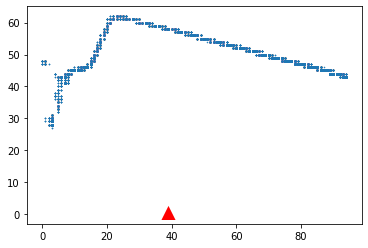

In [22]:
cell_size = 0.003
map_size_x = ((max(points_tdv[:,0]) - min(points_tdv[:,0])) // cell_size).astype(np.int) + 2
map_size_y = ((max(points_tdv[:,1]) - min(points_tdv[:,1])) // cell_size).astype(np.int) + 2
points_local_map = (points_tdv // cell_size).astype(np.int)
zero_pos = (-min(points_local_map[:,0]))
points_local_map[:,0] += zero_pos
print('map size = ({}; {})\ncell size = {}'.format(map_size_x, map_size_y, cell_size))
plt.scatter(points_local_map[:,0], points_local_map[:,1], s=cell_size*100)

plt.plot(zero_pos, 0, 'r^', mew=5)
plt.show()

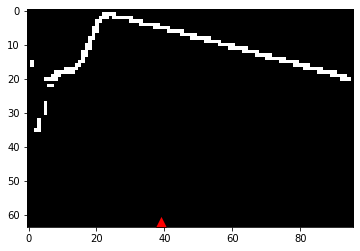

In [23]:
threshold = cell_size * 10000
local_map = np.zeros((map_size_y, map_size_x))
for point in points_local_map:
    local_map[map_size_y-point[1]-1, point[0]] += 1
local_map = (local_map > threshold)
plt.imshow(local_map, cmap='gray')

plt.plot(zero_pos, map_size_y-1, 'r^', mew=5)
plt.show()

In [24]:
res = env.sim().reset()

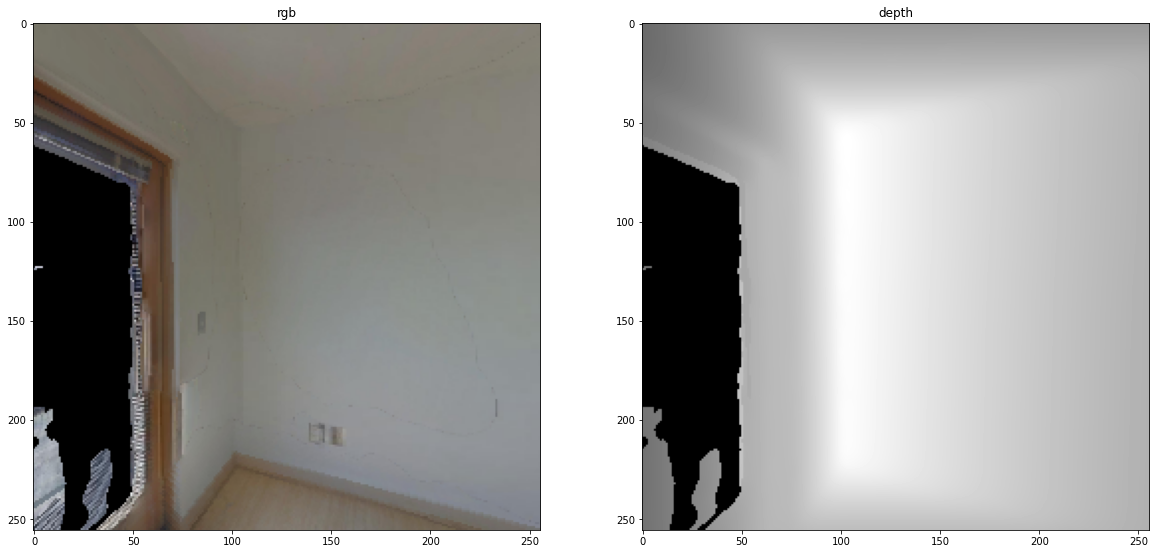

In [25]:
show_obs(env)

In [26]:
from quaternion import quaternion as quat
from math import acos

env.sim().get_agent_state()
# .position : x, hight, y  <-- np array
# .rotation : .a (complex: .real, .imag), .x (float), .y(float), .z(float) <--  quaternion.quaternion

# ~ 1/18 pi per rotation (36 - full circle)

AgentState(position=array([0.945982  , 0.15964921, 3.759702  ], dtype=float32), rotation=quaternion(0.578173756599426, 0, 0.815913677215576, 0), velocity=array([0., 0., 0.]), angular_velocity=array([0., 0., 0.]), force=array([0., 0., 0.]), torque=array([0., 0., 0.]), sensor_states={'rgb': SixDOFPose(position=array([0.945982 , 1.4096493, 3.759702 ], dtype=float32), rotation=quaternion(0.578173756599426, 0, 0.815913677215576, 0)), 'depth': SixDOFPose(position=array([0.945982 , 1.4096493, 3.759702 ], dtype=float32), rotation=quaternion(0.578173756599426, 0, 0.815913677215576, 0))})

In [27]:
def q_to_axisangle(q):
    # from quaternion to vector of rotation and angle of rotation
    w, v = q.a.real, (q.x, q.y, q.z)
    theta = acos(np.sign(q.y) * w) * 2.0
    return v, theta

In [28]:
def state():
    st = env.sim().get_agent_state()
    _, angle = q_to_axisangle(st.rotation)
    return {'pos' : st.position, 'rot' : st.rotation, 'ang' : angle}

In [29]:
res = env.sim().reset()

theta_0 = state()['ang']
angles = [theta_0/np.pi * 180]
theta_1 = theta_0
while(True):
    check = 0
    env.sim().step(2)
    if (theta_1 < theta_0):
        check += 1
    theta_1 = state()['ang']
    if (theta_1 >= theta_0):
        check += 1
    if check == 2:
        break
    angles.append(theta_1 / np.pi * 180)

In [30]:
len(angles) - 1

36

In [31]:
angles = np.array(angles)

In [32]:
angles

array([109.35560668, 119.35560661, 129.35560136, 139.35559798,
       149.35559985, 159.35560142, 169.3555996 , 179.35559899,
       189.35559821, 199.35559559, 209.35559467, 219.35559666,
       229.35559755, 239.35559692, 249.35559649, 259.35559714,
       269.35559628, 279.355591  , 289.35557385, 299.35558849,
       309.35556779, 319.35558455, 329.35560986, 339.35562865,
       349.35555404, 359.35593279,   9.35552485,  19.35552059,
        29.35555597,  39.35555553,  49.35555345,  59.35557521,
        69.35556105,  79.35555614,  89.35555983,  99.35555331,
       109.35555646])

In [33]:
((angles[1:] - angles[:-1]) % 360).mean()

9.999998604797188

{'pos': array([0.945982  , 0.15964921, 3.759702  ], dtype=float32), 'rot': quaternion(0.578173756599426, 0, 0.815913677215576, 0), 'ang': 1.9086153921623834}


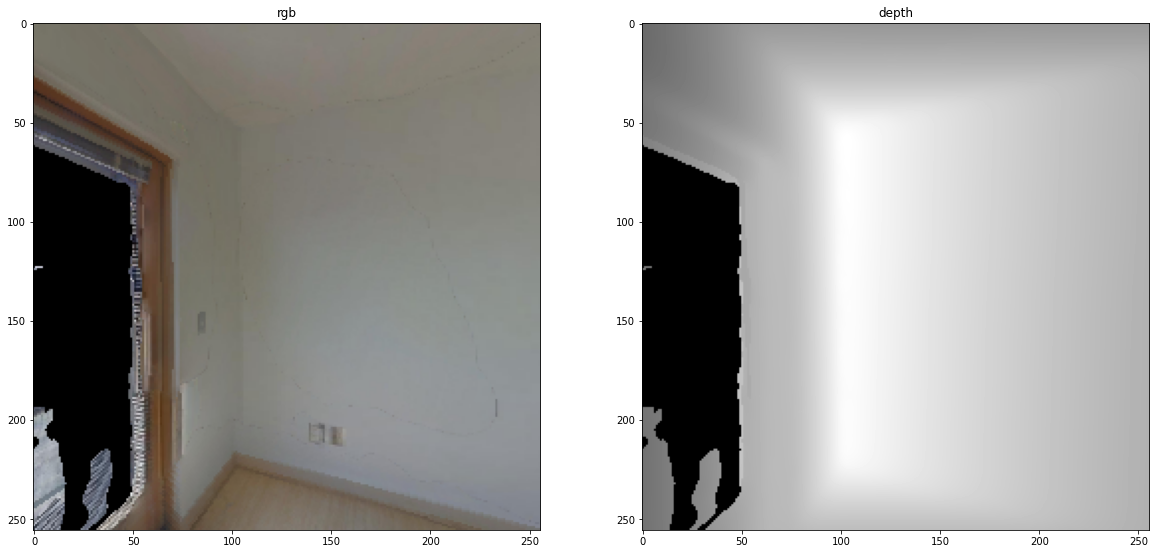

In [34]:
res = env.sim().reset()
print(state())
pos_0 = state()['pos']
show_obs(env)

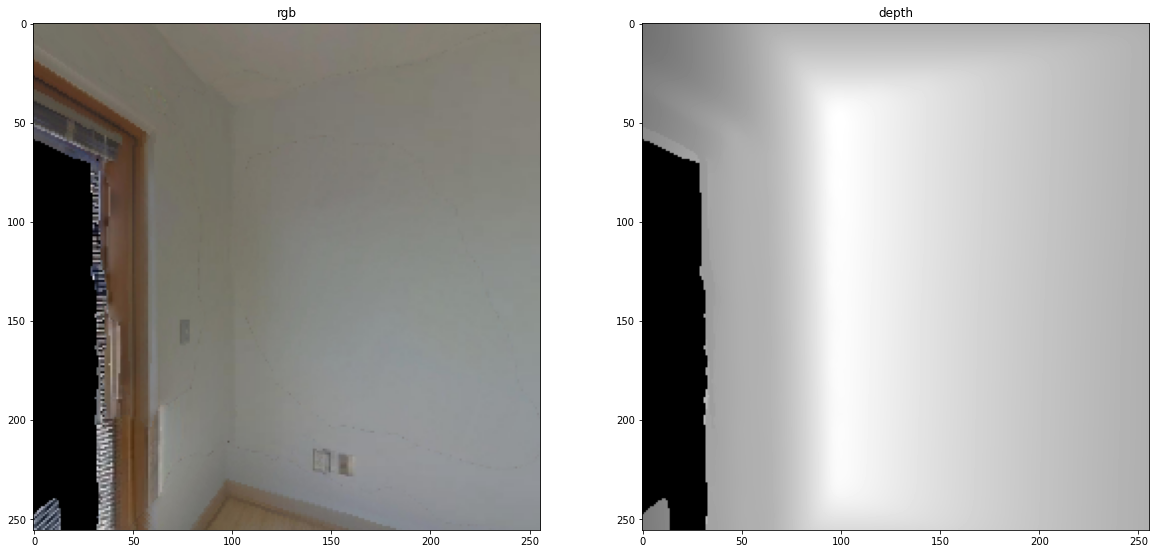

{'pos': array([0.71011204, 0.15964921, 3.8425596 ], dtype=float32), 'rot': quaternion(0.578173756599426, 0, 0.815913677215576, 0), 'ang': 1.9086153921623834}


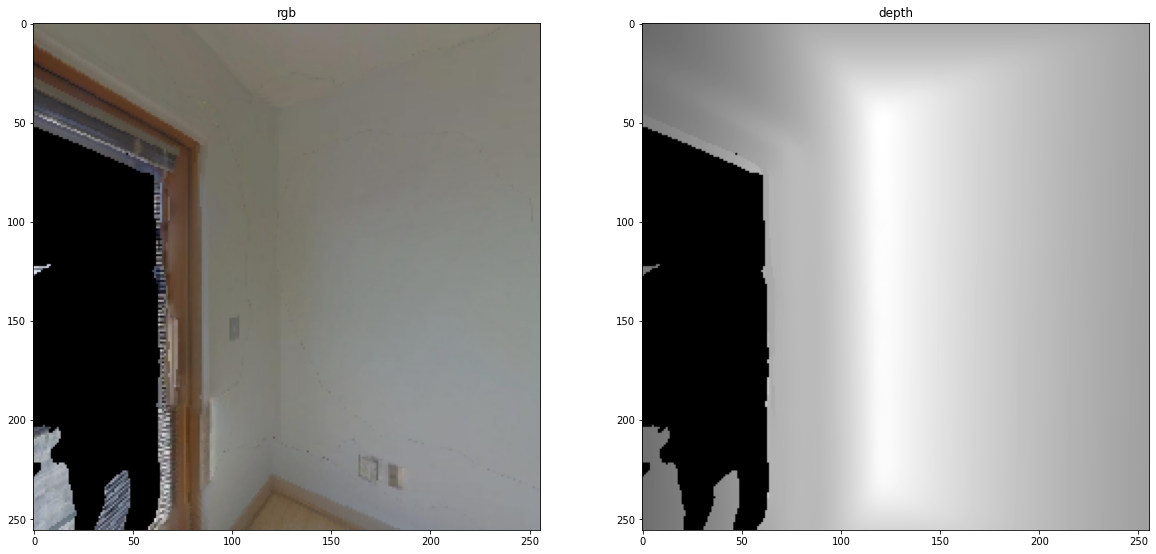

{'pos': array([0.71011204, 0.15964921, 3.8425596 ], dtype=float32), 'rot': quaternion(0.504862070083618, 0, 0.863200008869171, 0), 'ang': 2.083148315991286}


In [35]:
res = env.sim().step(1)
show_obs(env)
print(state())
pos_1 = state()['pos']
ang_0 = state()['ang']
res = env.sim().step(2)
show_obs(env)
ang_1 = state()['ang']
print(state())

In [36]:
step_size = ((pos_1 - pos_0)**2).sum()
rot_size = ang_1 - ang_0
print('step size = {}\nrotation size = {}'.format(step_size, rot_size))

step size = 0.0625000149011612
rotation size = 0.17453292382890262


In [37]:
res = env.sim().reset()
angls = [state()['ang']]
for i in range(36):
    res = env.sim().step(2)
    angls.append(state()['ang'])
angls = np.array(angls)

In [38]:
(angls[1:] - angls[:-1]) / (2*np.pi) * 360

array([   9.99999992,    9.99999476,    9.99999662,   10.00000187,
         10.00000157,    9.99999818,    9.99999939,    9.99999921,
          9.99999739,    9.99999908,   10.00000199,   10.00000089,
          9.99999937,    9.99999957,   10.00000065,    9.99999914,
          9.99999472,    9.99998285,   10.00001464,    9.9999793 ,
         10.00001676,   10.00002531,   10.00001879,    9.99992539,
         10.00037876, -350.00040794,    9.99999574,   10.00003539,
          9.99999956,    9.99999792,   10.00002176,    9.99998584,
          9.99999509,   10.00000369,    9.99999348,   10.00000315])

In [39]:
def ptsCloud2localMap(pts, cell_size=0.001, floor_lvl=None, head_lvl=None):
    len_z = max(pts[:,0]) - min(pts[:,0])
    if floor_lvl == None:
        floor_lvl = min(pts[:,0]) + 0.1*len_z
    if head_lvl == None:
        head_lvl = max(pts[:,0]) - 0.3*len_z
    points_tdv = pts[(pts[:,0] > floor_lvl) * (pts[:,0] < head_lvl)][:,1:]
    
    map_size_x = ((max(points_tdv[:,0]) - min(points_tdv[:,0])) // cell_size).astype(np.int) + 2
    # map_size_y = ((max(points_tdv[:,1]) - min(points_tdv[:,1])) // cell_size).astype(np.int) + 2
    map_size_y = (max(points_tdv[:,1]) // cell_size).astype(np.int) + 1
    points_local_map = (points_tdv // cell_size).astype(np.int)
    zero_pos = (-min(points_local_map[:,0]))
    points_local_map[:,0] += zero_pos
    
    threshold = cell_size * 10000
    local_map = np.zeros((map_size_y, map_size_x))
    for point in points_local_map:
        local_map[map_size_y-point[1]-1, point[0]] += 1
    local_map = (local_map > threshold)
    
    return (local_map, zero_pos)

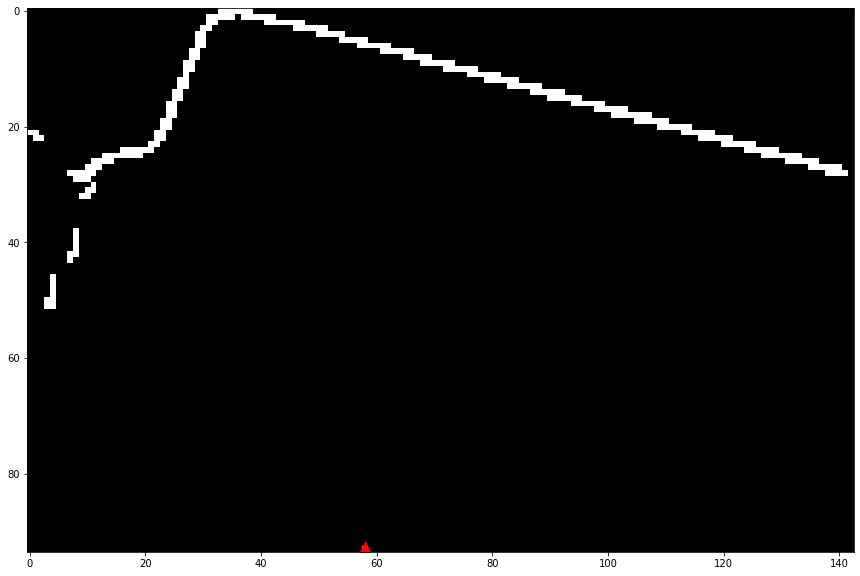

In [40]:
local_map, zero_pos = ptsCloud2localMap(points, 0.002)
fig, ax = plt.subplots(figsize=(22, 10))
# to view starting from k_h % of h and from k_w % of w
k_h, k_w = 0., 0.
plt.imshow(local_map[round(k_h*local_map.shape[0]):,round(k_w*local_map.shape[1]):], cmap='gray')
plt.plot(zero_pos - k_w*local_map.shape[1], (1-k_h)*local_map.shape[0]-1, 'r^', mew=5)

# plt.imshow(local_map, cmap='gray')
# plt.plot(zero_pos, local_map.shape[0]-1, 'r^', mew=5)

plt.show()

In [41]:
def adopt_global_map(old_global_map, x, y, angle, local_map, zero_pos):
    sin, cos = np.sin(angle), np.cos(angle)
    map_size_is_ok = True
    left_adj, right_adj, top_adj, down_adj = 0, 0, 0, 0
    #for pt in [(0,0), (0,local_map.shape[1]-1), (local_map.shape[0]-1,0), (local_map.shape[0]-1, local_map.shape[1]-1)]:
    #    dh = local_map.shape[0] - 1 - pt[0]
    #    dw = zero_pos - pt[1]
    #    dy = round(-dh*cos + dw*sin)
    #    dx = round(-dh*sin - dw*cos)
    #    x_new = int(round(x+dx))
    #    y_new = int(round(y+dy))
    #    if (x_new < 0):
    #        left_adj = max(left_adj, -x_new)
    #    if (y_new < 0):
    #        top_adj = max(top_adj, -y_new)
    #    if (x_new >= old_global_map.shape[1]):
    #        right_adj = max(right_adj, x_new-old_global_map.shape[1]+1)
    #    if (y_new >= old_global_map.shape[0]):
    #        down_adj = max(down_adj, y_new-old_global_map.shape[0]+1)
    #    print('checked for {}: ({}, {})'.format(pt, x_new, y_new))
    
    pts = []
    # +delt вдоль h: y -= delt*cos, x -= delt*sin
    # +delt вдоль w: y += delt*sin, x -= delt*cos
    for i in range(local_map.shape[0]):
        for j in range(local_map.shape[1]):
            if local_map[i,j]:
                dh = local_map.shape[0] - 1 - i
                dw = zero_pos - j
                dy = round(-dh*cos + dw*sin)
                dx = round(-dh*sin - dw*cos)
                x_new = int(round(x+dx))
                y_new = int(round(y+dy))
                if (x_new < 0):
                    left_adj = max(left_adj, -x_new)
                if (y_new < 0):
                    top_adj = max(top_adj, -y_new)
                if (x_new >= old_global_map.shape[1]):
                    right_adj = max(right_adj, x_new-old_global_map.shape[1]+1)
                if (y_new >= old_global_map.shape[0]):
                    down_adj = max(down_adj, y_new-old_global_map.shape[0]+1)
                pts.append((y_new, x_new))
                
                # if (x_new >= 0) and (x_new < new_global_map.shape[1]) and (y_new >= 0) and (y_new < new_global_map.shape[0]):
                #     new_global_map[y_new, x_new] = 1
                # else:
                #     map_size_is_ok = False
                #     print('in point ({}, {}) - out of bounds\twhich is corresponds to local point ({}, {})'.format(y_new, x_new, i, j))
    
    new_global_map = np.zeros((old_global_map.shape[0] + top_adj + down_adj, old_global_map.shape[1] + right_adj + left_adj))
    new_global_map[top_adj : top_adj + old_global_map.shape[0], left_adj : left_adj + old_global_map.shape[1]] = old_global_map
    if new_global_map.shape != old_global_map.shape:
        print('map size changed left: {}, right: {}, top: {}, down: {}\nnew map size = {}'.format(left_adj, right_adj, top_adj, down_adj, new_global_map.shape))
    x_ = x + left_adj
    y_ = y + top_adj
    
    for pt in pts:
        new_global_map[pt[0]+top_adj, pt[1]+left_adj] = 1
    
    return new_global_map, x_, y_

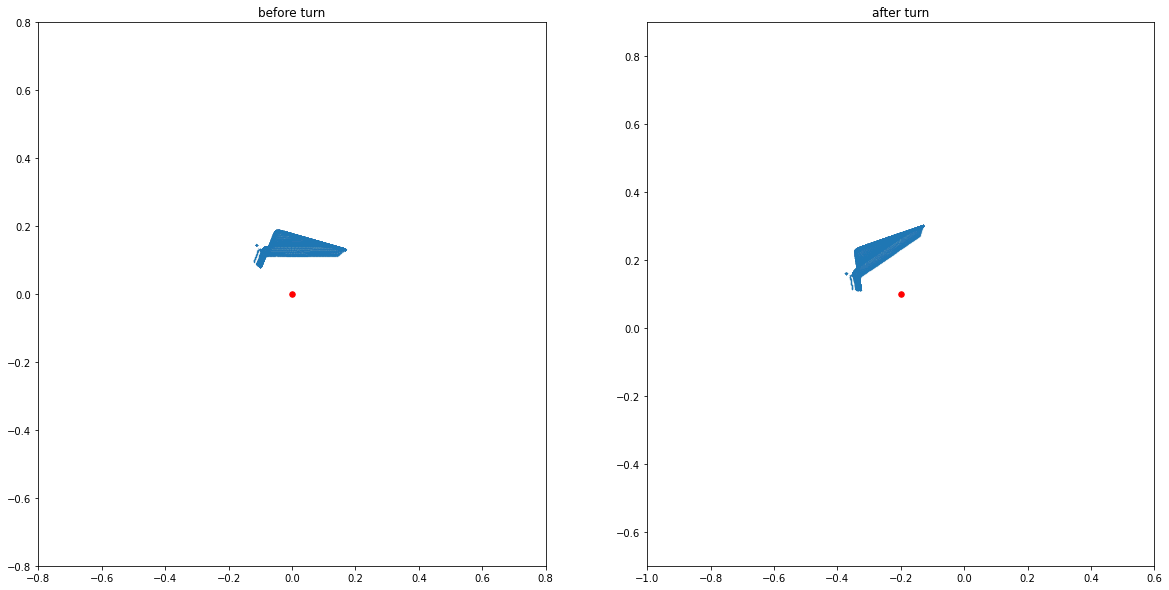

In [42]:
angle = np.pi/2 - 1
x, y = -0.2, 0.1
lims = 0.8

points_turned = np.zeros_like(points)
rot_matrix = np.array([[np.cos(-angle), -np.sin(-angle)],
                       [np.sin(-angle), np.cos(-angle)]])
points_turned[:,1:] = points[:,1:] @ rot_matrix + np.array([x, y])[None,:]

fig, ax = plt.subplots(1, 2, figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.title('before turn')
plt.scatter(points[:,1], points[:,2], s=0.01)
plt.scatter([0], [0], c='r', s=30)
plt.ylim(-lims, lims)
plt.xlim(-lims, lims)

plt.subplot(1, 2, 2)
plt.title('after turn')
plt.scatter(points_turned[:,1],
            points_turned[:,2], s=0.01)
plt.scatter([x], [y], c='r', s=30)
plt.ylim(y-lims, y+lims)
plt.xlim(x-lims, x+lims)

plt.show()

In [43]:
a = -4
b = 5
int(a/b) + a/abs(a)*(a%b>0)

-1.0

In [44]:
def round_abs_up(a, b=1.):
    sign_a = 2*(1/2-1*(a < 0))
    return int(int(a/b) + sign_a*(a%b > 0))

In [45]:
def adopt_global_map_with_pts_cloud(old_global_map, x, y, angle, pts, cell_size=0.001, floor_lvl=None, head_lvl=None):
    len_z = max(pts[:,0]) - min(pts[:,0])
    if floor_lvl == None:
        floor_lvl = min(pts[:,0]) + 0.1*len_z
    if head_lvl == None:
        head_lvl = max(pts[:,0]) - 0.3*len_z
    points_tdv = pts[(pts[:,0] > floor_lvl) * (pts[:,0] < head_lvl)][:,1:]
    points_tdv[:,1] = -points_tdv[:,1]
    
    rot_matrix = np.array([[np.cos(angle), -np.sin(angle)],
                           [np.sin(angle), np.cos(angle)]])
    points_tdv = points_tdv @ rot_matrix
    
    min_y, max_y = np.min(points_tdv[:,1]), np.max(points_tdv[:,1])
    min_x, max_x = np.min(points_tdv[:,0]), np.max(points_tdv[:,0])
    
    left_adj = max(0, round_abs_up(- x - min_x/cell_size))
    right_adj = max(0, round_abs_up(x + max_x/cell_size - old_global_map.shape[1] + 1))
    top_adj = max(0, round_abs_up(- y - min_y/cell_size))
    down_adj = max(0, round_abs_up(y + max_y/cell_size - old_global_map.shape[0] + 1))
    
    points_tdv = points_tdv / cell_size
    points_tdv += np.array([x+left_adj, y+top_adj])[None,:]
    points_tdv = np.round(points_tdv).astype(np.int)
    
    new_global_map = np.zeros((old_global_map.shape[0] + top_adj + down_adj, old_global_map.shape[1] + right_adj + left_adj))
    
    threshold = cell_size * 1000
    for point in points_tdv:
        new_global_map[point[1], point[0]] += 1
    new_global_map = (new_global_map > threshold)
    
    new_global_map[top_adj : top_adj + old_global_map.shape[0],
                   left_adj : left_adj + old_global_map.shape[1]] = (new_global_map[top_adj : top_adj + old_global_map.shape[0],
                                                                                   left_adj : left_adj + old_global_map.shape[1]] + old_global_map > 0)
    
    return new_global_map, x + left_adj, y + top_adj

In [46]:
pts = np.copy(points)
old_global_map = np.zeros((1000, 1000))
x, y = 100, 500
angle = np.pi/2
cell_size = 0.002

In [47]:
len_z = max(pts[:,0]) - min(pts[:,0])
if floor_lvl == None:
    floor_lvl = min(pts[:,0]) + 0.1*len_z
if head_lvl == None:
    head_lvl = max(pts[:,0]) - 0.3*len_z
points_tdv = pts[(pts[:,0] > floor_lvl) * (pts[:,0] < head_lvl)][:,1:]

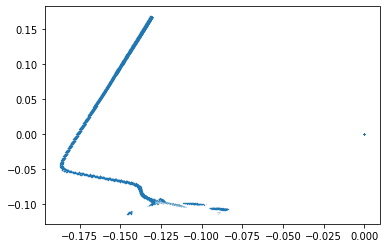

In [48]:
rot_matrix = np.array([[np.cos(-angle), -np.sin(-angle)],
                       [np.sin(-angle), np.cos(-angle)]])
points_tdv = points_tdv @ rot_matrix

plt.scatter(points_tdv[:,0], points_tdv[:,1], s=0.01)
plt.show()

In [49]:
min_y, max_y = np.min(points_tdv[:,1]), np.max(points_tdv[:,1])
min_x, max_x = np.min(points_tdv[:,0]), np.max(points_tdv[:,0])

left_adj = max(0, round_abs_up(- x - min_x/cell_size))
right_adj = max(0, round_abs_up(x + max_x/cell_size - old_global_map.shape[1] + 1))
top_adj = max(0, round_abs_up(- y - min_y/cell_size))
down_adj = max(0, round_abs_up(y + max_y/cell_size - old_global_map.shape[0] + 1))

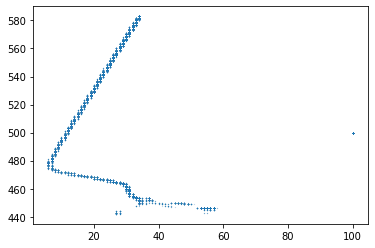

In [50]:
points_tdv = (points_tdv // cell_size).astype(np.int)
points_tdv += np.array([x+left_adj, y+top_adj])[None,:]

plt.scatter(points_tdv[:,0], points_tdv[:,1], s=0.01)
plt.show()

In [51]:
new_global_map = np.zeros((old_global_map.shape[0] + top_adj + down_adj, old_global_map.shape[1] + right_adj + left_adj))

threshold = cell_size * 10000
for point in points_tdv:
    new_global_map[point[0], new_global_map.shape[1]-point[1]-1] += 1
new_global_map = (new_global_map > threshold)

In [52]:
new_global_map[top_adj : top_adj + old_global_map.shape[0],
               left_adj : left_adj + old_global_map.shape[1]] = (new_global_map[top_adj : top_adj + old_global_map.shape[0],
                                                                               left_adj : left_adj + old_global_map.shape[1]] + old_global_map > 0)

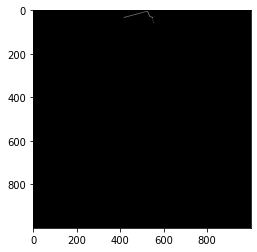

In [55]:
plt.imshow(new_global_map, cmap='gray')
plt.show()

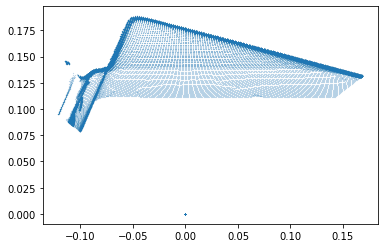

In [56]:
plt.scatter(points[:,1], points[:,2], s=0.01)
plt.show()

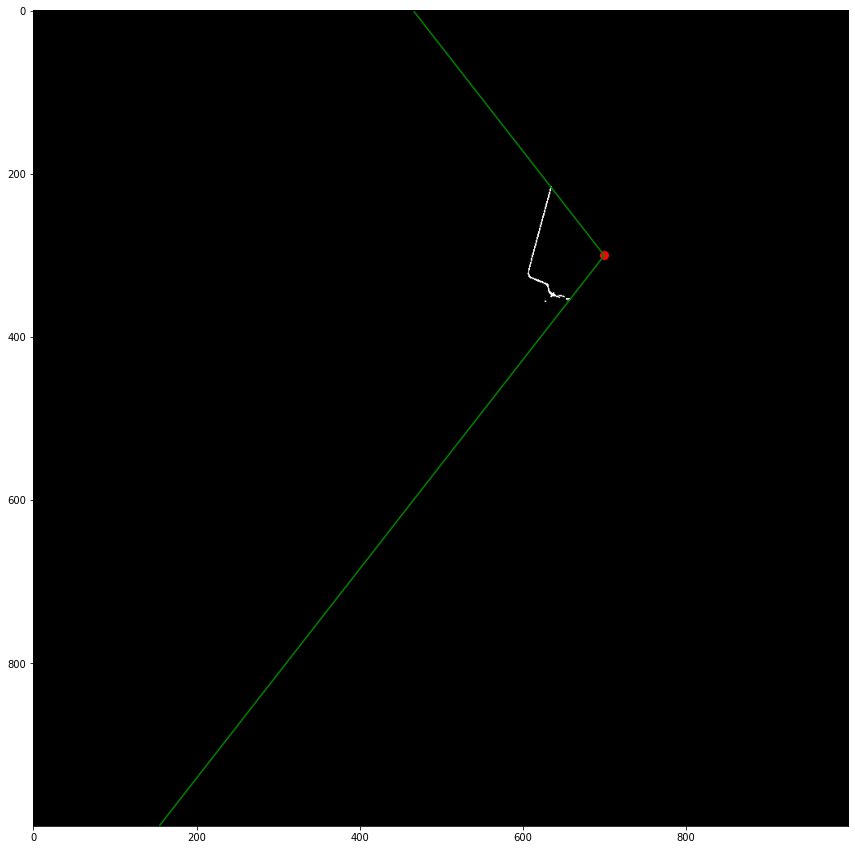

In [62]:
global_map_ = np.zeros((1000, 1000))
x, y = 700, 300
angle = np.pi/2

fig, ax = plt.subplots(figsize=(24, 15))

# h_from, h_to, w_from, w_to = 0, global_map_.shape[0], 0, global_map_.shape[1]
# h_from, h_to, w_from, w_to = 400, 800, 400, 650

global_map_, x, y = adopt_global_map_with_pts_cloud(global_map_, x, y, angle, points, 0.002) # [h_from:h_to,w_from:w_to]
plt.imshow(global_map_, cmap='gray')
# plt.imshow(adopt_global_map(global_map_, x, y, angle, local_map, zero_pos, 0.002), cmap='gray')

# plot_agent_on_map(x-w_from, y-h_from, angle, h_to-h_from, w_to-w_from)
plot_agent_on_map(x, y, angle, global_map_.shape[0], global_map_.shape[1])

plt.show()

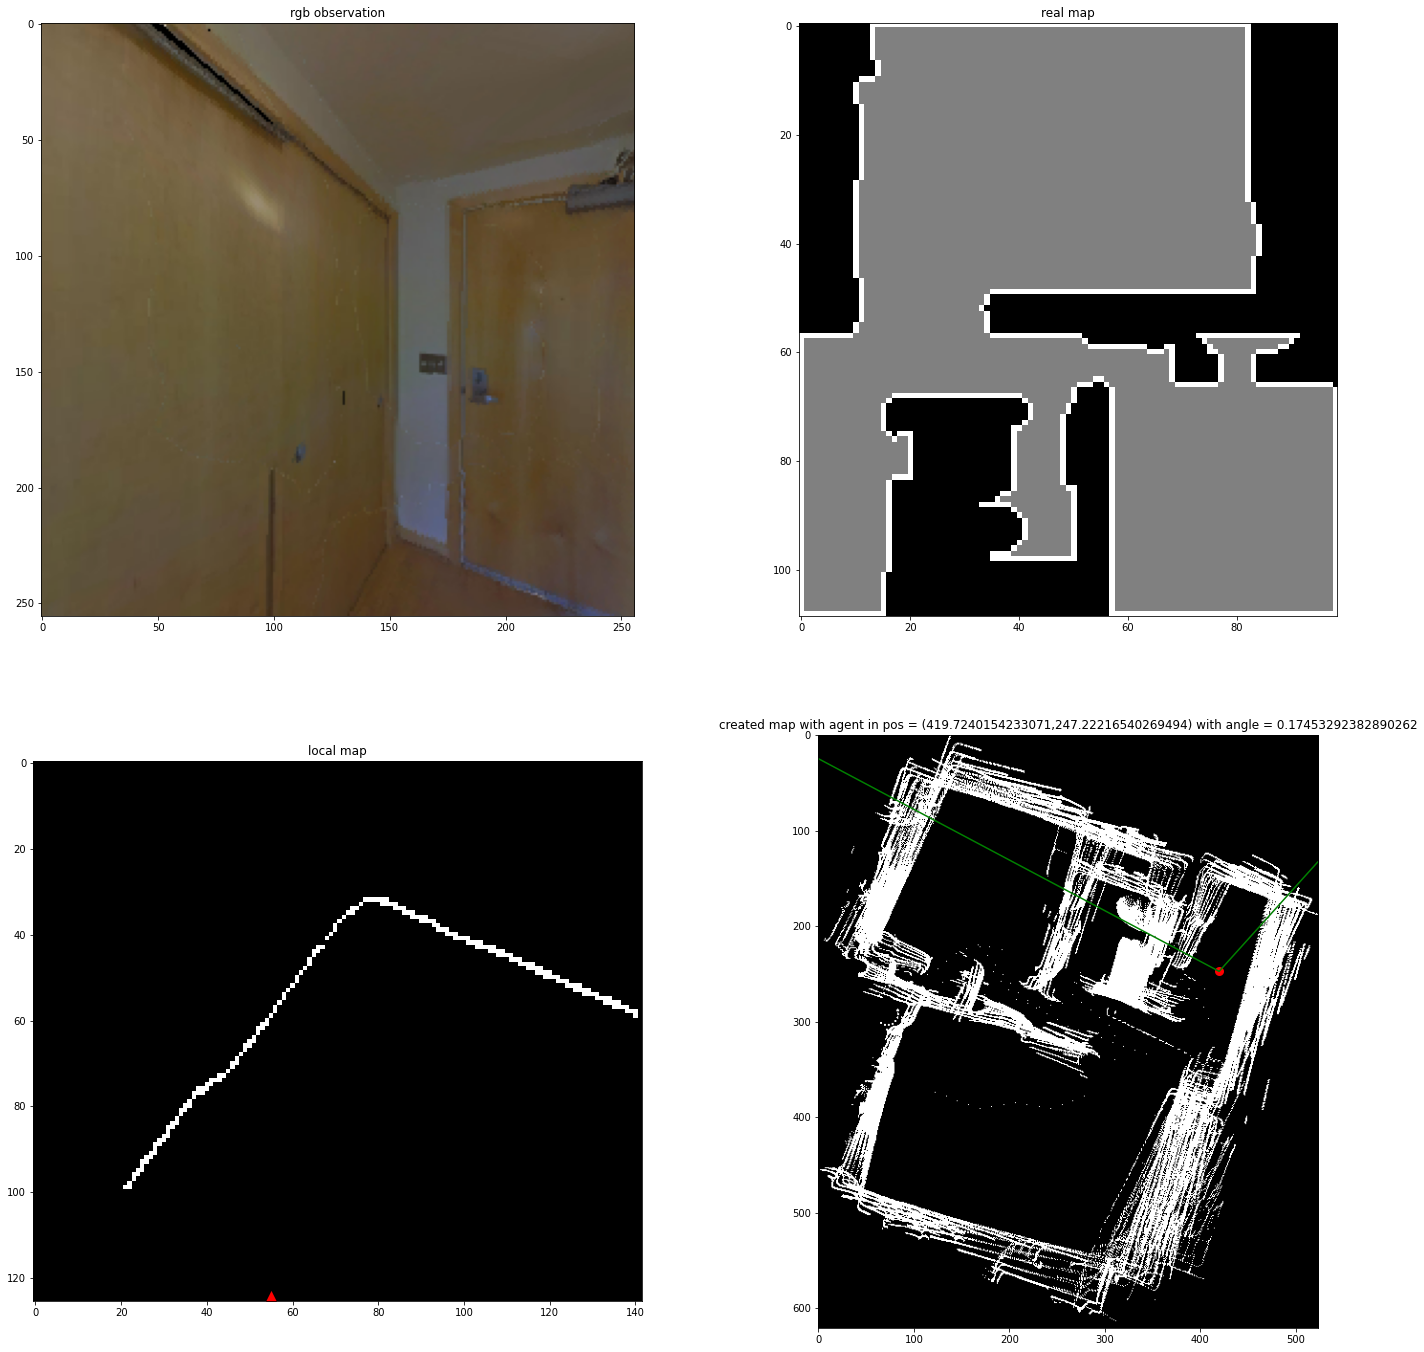

 f


In [65]:
res = env.sim().reset()
# fig, ax = plt.subplots(figsize=(20, 12))
# plt.imshow(res['rgb'])
# plt.show()

# константы для Depth to Points cloud
cx, cy = 127.5, 127.5
fx, fy = 100, 100

size_of_map = 2000
global_map = np.zeros((10, 10))
cell_size = 0.002
# x, y, ang = size_of_map//2, size_of_map//2, 0
x, y, ang = 0, 0, 0

top_down_map = maps.get_topdown_map(env.sim(), map_resolution=(size_of_map, size_of_map), draw_border=True)
pos = get_informative_part(top_down_map)
top_down_map = top_down_map[pos[0]:pos[1], pos[2]:pos[3]]


c = ''
actions = {'w':1, 'a':2, 'd':3}
while(True):    
    fig, ax = plt.subplots(2, 2, figsize=(24, 24))
    
    
    # rgb view
    plt.subplot(2, 2, 1)
    plt.imshow(res['rgb'])
    plt.title('rgb observation')
    
    
    # local map
    points = depth2ptsCloud(res['depth'][:,:,0], cx, cy, fx, fy)
    local_map, zero_pos = ptsCloud2localMap(points, cell_size)
    
    plt.subplot(2, 2, 3)
    plt.imshow(local_map, cmap='gray')
    plt.plot(zero_pos, local_map.shape[0]-1, 'r^', mew=5)
    plt.title('local map')
    
    
    
    # full real map
    plt.subplot(2, 2, 2)
    plt.imshow(top_down_map, cmap='gray')
    plt.title('real map')
    
    
    # evaluated map
    global_map, x, y = adopt_global_map_with_pts_cloud(global_map, x, y, ang, points, cell_size)
    
    plt.subplot(2, 2, 4)
    plt.imshow(global_map, cmap='gray')
    plot_agent_on_map(x, y, ang, global_map.shape[0], global_map.shape[1])
    plt.title('created map with agent in pos = ({},{}) with angle = {}'.format(x, y, ang))
    
    
    plt.show()
    
    c = input()
    if (c not in actions):
        break
    res = env.sim().step(action=actions[c])
    
    x, y, ang = tracking_position(x, y, ang, c, cell_size)
    
    clear_output(True)

In [109]:
from importlib import reload
import mapping_and_localization
reload(mapping_and_localization)
from mapping_and_localization import map_and_localize

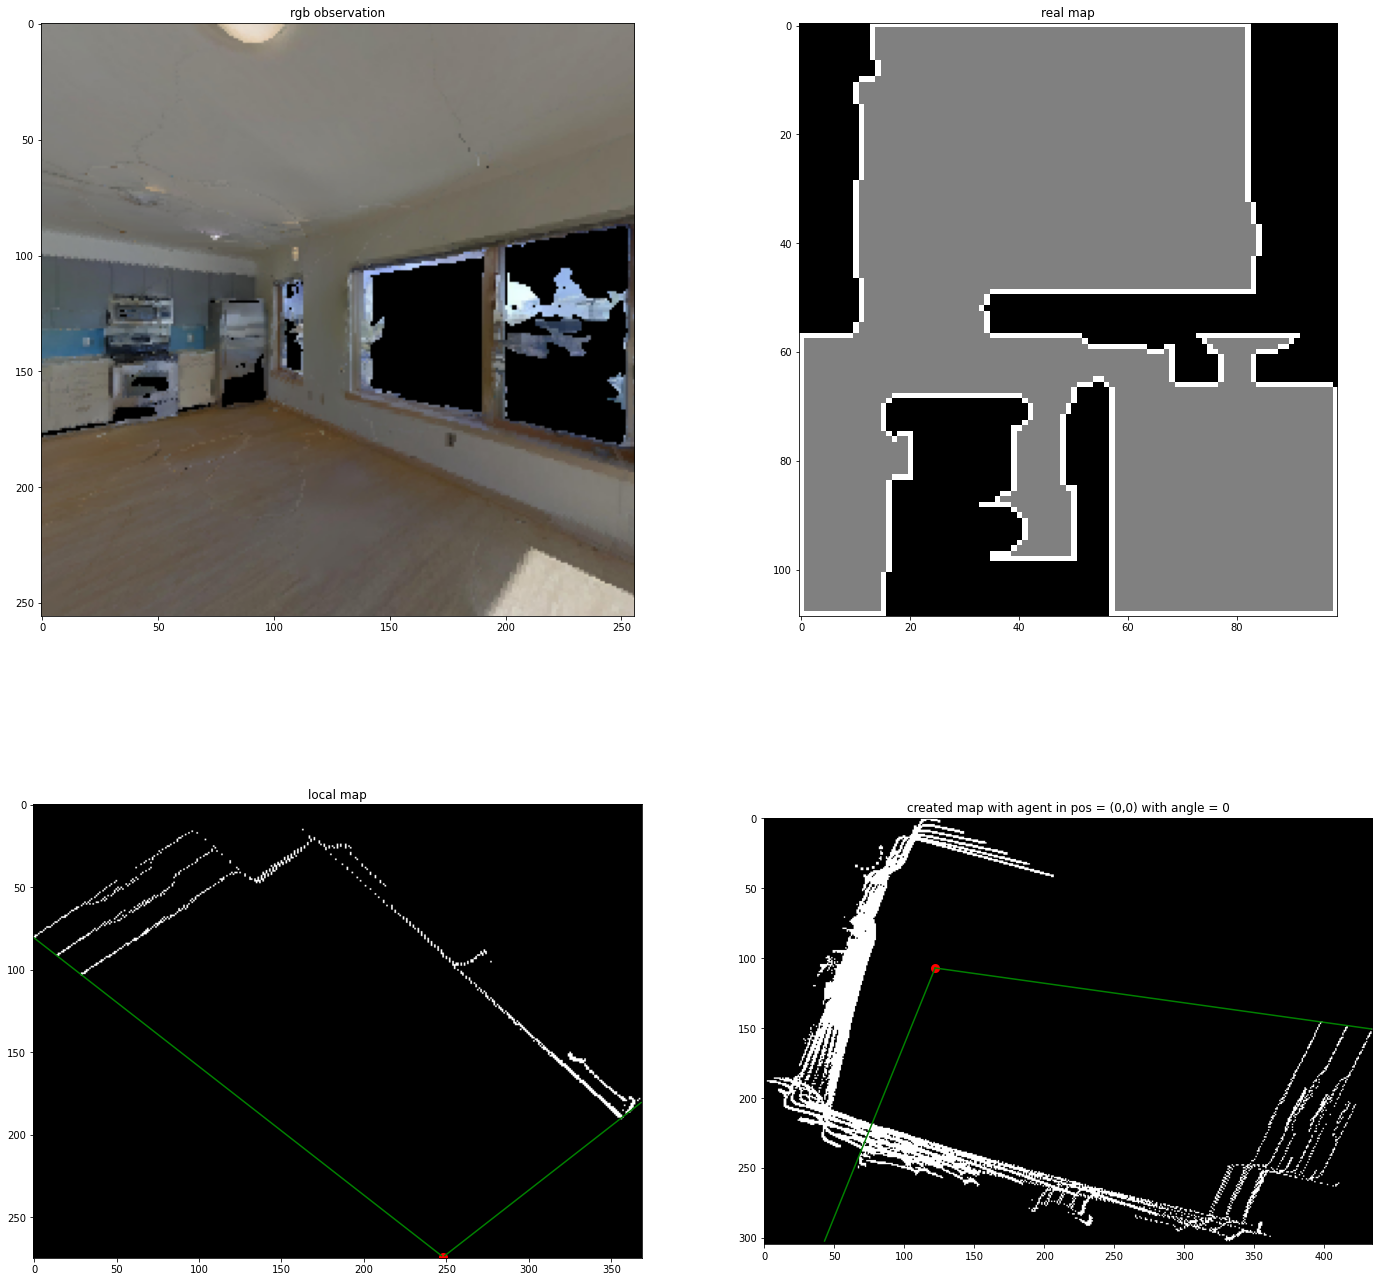

 f


In [110]:
res = env.sim().reset()
# fig, ax = plt.subplots(figsize=(20, 12))
# plt.imshow(res['rgb'])
# plt.show()

size_of_map = 2000
cell_size = 0.002
# x, y, ang = size_of_map//2, size_of_map//2, 0
x, y, ang = 0, 0, 0
mal = None

top_down_map = maps.get_topdown_map(env.sim(), map_resolution=(size_of_map, size_of_map), draw_border=True)
pos = get_informative_part(top_down_map)
top_down_map = top_down_map[pos[0]:pos[1], pos[2]:pos[3]]


c = ''
actions = {'w':1, 'a':2, 'd':3}
while(True):    
    fig, ax = plt.subplots(2, 2, figsize=(24, 24))
    
    
    # rgb view
    plt.subplot(2, 2, 1)
    plt.imshow(res['rgb'])
    plt.title('rgb observation')
    
    
    # evaluated map
    if mal == None:
        mal = map_and_localize(res['depth'][:,:,0], cell_size, x, y, ang)
    else:
        mal.update(res['depth'][:,:,0], c)
    
    plt.subplot(2, 2, 4)
    mal.draw_global_map(False)
    plt.title('created map with agent in pos = ({},{}) with angle = {}'.format(x, y, ang))
    
    
    # local map
    plt.subplot(2, 2, 3)
    mal.draw_local_map(False)
    plt.title('local map')
    
    
    
    # full real map
    plt.subplot(2, 2, 2)
    plt.imshow(top_down_map, cmap='gray')
    plt.title('real map')
    
    
    
    plt.show()
    
    c = input()
    if (c not in actions):
        break
    res = env.sim().step(action=actions[c])
    
    clear_output(True)

In [60]:
half_angle_of_view = np.pi/2 - np.arctan(0.78)

In [61]:
half_angle_of_view

0.9083700329617453

In [58]:
def plot_agent_on_map(x, y, angle, map_sh, map_sw):
    plt.plot(x, y, 'ro', mew=3)
    
    ang1 = angle + half_angle_of_view
    while(ang1 < 0):
        ang1 += 2*np.pi
    while(ang1 >= 2*np.pi):
        ang1 -= 2*np.pi
    
    ang2 = angle - half_angle_of_view
    while(ang2 < 0):
        ang2 += 2*np.pi
    while(ang2 >= 2*np.pi):
        ang2 -= 2*np.pi
    
    a1, a2 = 1./np.tan(ang1), 1./np.tan(ang2)
    b1, b2 = y-a1*x, y-a2*x
    
    xx = np.arange(map_sw)
    yy1, yy2 = np.array([a1*x_+b1 for x_ in xx]), np.array([a2*x_+b2 for x_ in xx])
    xx1, xx2 = xx[(yy1>0)*(yy1<map_sh-1)], xx[(yy2>0)*(yy2<map_sh-1)]
    yy1, yy2 = yy1[(yy1>0)*(yy1<map_sh-1)], yy2[(yy2>0)*(yy2<map_sh-1)]
    
    if (ang1 <= np.pi):
        yy1 = yy1[xx1 <= x]
        xx1 = xx1[xx1 <= x]
    else:
        yy1 = yy1[xx1 >= x]
        xx1 = xx1[xx1 >= x]
    
    if (ang2 <= np.pi):
        yy2 = yy2[xx2 <= x]
        xx2 = xx2[xx2 <= x]
    else:
        yy2 = yy2[xx2 >= x]
        xx2 = xx2[xx2 >= x]
    
    plt.plot(xx1, yy1, 'g')
    plt.plot(xx2, yy2, 'g')

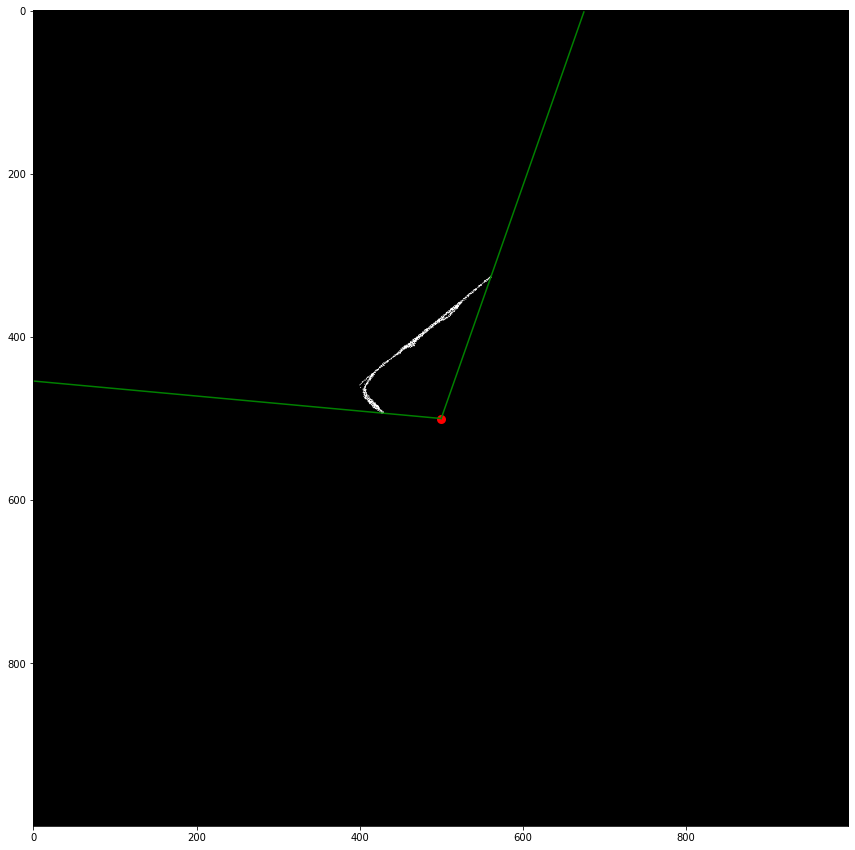

In [171]:
global_map_ = np.zeros((1000, 1000))
x, y = 500, 500
angle = np.pi/2 - 1

fig, ax = plt.subplots(figsize=(24, 15))

# h_from, h_to, w_from, w_to = 0, global_map_.shape[0], 0, global_map_.shape[1]
# h_from, h_to, w_from, w_to = 400, 800, 400, 650

global_map_, x, y = adopt_global_map(global_map_, x, y, angle, local_map, zero_pos) # [h_from:h_to,w_from:w_to]
plt.imshow(global_map_, cmap='gray')
# plt.imshow(adopt_global_map(global_map_, x, y, angle, local_map, zero_pos, 0.002), cmap='gray')

# plot_agent_on_map(x-w_from, y-h_from, angle, h_to-h_from, w_to-w_from)
plot_agent_on_map(x, y, angle, global_map_.shape[0], global_map_.shape[1])

plt.show()

In [64]:
step_size = step_size * 0.4
# step_size = 0.25 * 0.1
# rot_size = np.pi / 18

def tracking_position(x, y, ang, action, cell_size, step_size=step_size):
    if (action == 'w'):
        real_step_size = step_size/cell_size
        sin, cos = np.sin(ang), np.cos(ang)
        dx, dy = sin * real_step_size, cos * real_step_size
        return x-dx, y-dy, ang
    elif (action == 'a'):
        return x, y, ang+rot_size
    elif (action == 'd'):
        return x, y, ang-rot_size

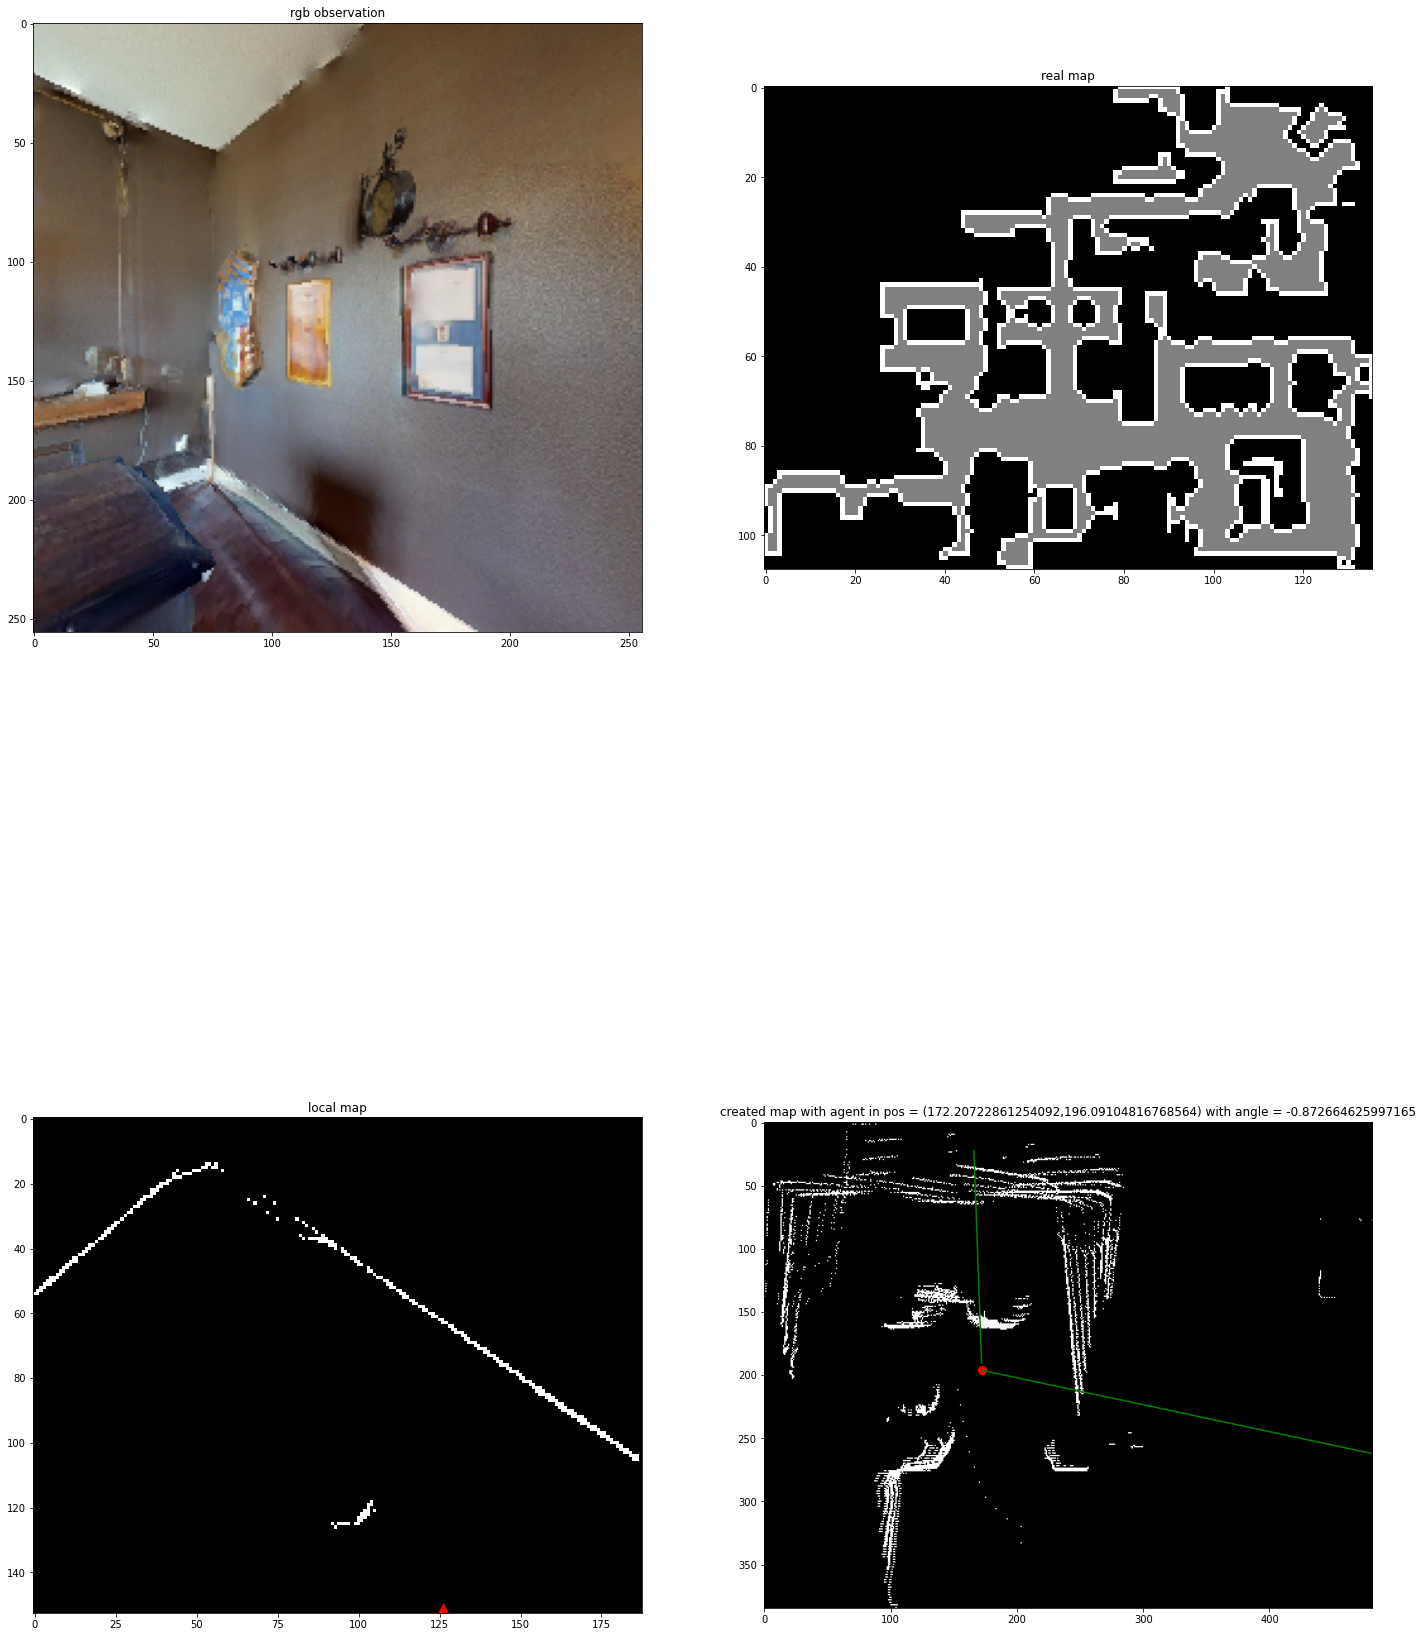

In [452]:
res = env.sim().reset()
# fig, ax = plt.subplots(figsize=(20, 12))
# plt.imshow(res['rgb'])
# plt.show()

# константы для Depth to Points cloud
cx, cy = 127.5, 127.5
fx, fy = 100, 100

# size_of_map = 1500
global_map = np.zeros((10, 10))
cell_size = 0.002
# x, y, ang = size_of_map//2, size_of_map//2, 0
x, y, ang = 0, 0, 0

top_down_map = maps.get_topdown_map(env.sim(), map_resolution=(size_of_map, size_of_map), draw_border=True)
pos = get_informative_part(top_down_map)
top_down_map = top_down_map[pos[0]:pos[1], pos[2]:pos[3]]


c = ''
actions = {'w':1, 'a':2, 'd':3}
while(True):    
    fig, ax = plt.subplots(2, 2, figsize=(24, 35))
    
    
    # rgb view
    plt.subplot(2, 2, 1)
    plt.imshow(res['rgb'])
    plt.title('rgb observation')
    
    
    # local map
    points = depth2ptsCloud(res['depth'][:,:,0], cx, cy, fx, fy)
    local_map, zero_pos = ptsCloud2localMap(points, cell_size)
    
    plt.subplot(2, 2, 3)
    plt.imshow(local_map, cmap='gray')
    plt.plot(zero_pos, local_map.shape[0]-1, 'r^', mew=5)
    plt.title('local map')
    
    
    
    # full real map
    plt.subplot(2, 2, 2)
    plt.imshow(top_down_map, cmap='gray')
    plt.title('real map')
    
    
    # evaluated map
    global_map, x, y = adopt_global_map(global_map, x, y, ang, local_map, zero_pos)
    
    plt.subplot(2, 2, 4)
    plt.imshow(global_map, cmap='gray')
    plot_agent_on_map(x, y, ang, global_map.shape[0], global_map.shape[1])
    plt.title('created map with agent in pos = ({},{}) with angle = {}'.format(x, y, ang))
    
    
    plt.show()
    
    c = input()
    if (c not in actions):
        break
    res = env.sim().step(action=actions[c])
    
    x, y, ang = tracking_position(x, y, ang, c, cell_size)
    
    clear_output(True)